## 1. 필요한 모듈 설치

In [2]:
!pip install opencv-python
!pip install cmake
!pip install dlib

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

## 2. 얼굴 영역 찾기

dlib의 face detector는 HOG(Histogram of Oriented Gradients) feature를 사용해서 SVM(Support Vector Machine)의 sliding window로 얼굴을 찾습니다. 

얼굴 영역 좌표 : rectangles[[(175, 199) (282, 307)]]


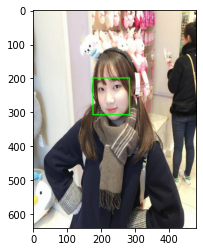

In [7]:
my_image_path = '/content/drive/MyDrive/Github/AIFFEL/E03/camera_sticker/images/jungin.png'
img_bgr = cv2.imread(my_image_path)    
img_bgr = cv2.resize(img_bgr, (480,640)) # Resize image
img_show = img_bgr.copy() #image copy
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BGR-> RGB


detector_hog = dlib.get_frontal_face_detector()   #detector

dlib_rects = detector_hog(img_rgb, 1)#(image, num of img pyramid)
print(f'얼굴 영역 좌표 : {dlib_rects}')

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


## 얼굴 랜드마크 face landmark

landmark 찾기

landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환


In [8]:
#load saved model
model_path = '/content/drive/MyDrive/Github/AIFFEL/E03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


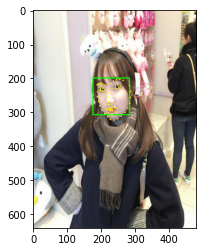

68


In [9]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show, dlib_rect)
    list_points = list(map(lambda p:(p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# #코 위치   
# print(len(list_landmarks[0]))

# landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0,255,255), -1) # yellow
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
print(len(list_landmarks[0]))

## 스티커 적용하기

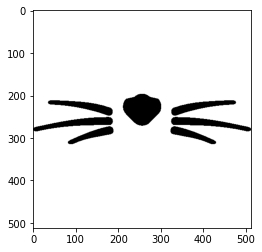

In [10]:
#read sticker
sticker_path = '/content/drive/MyDrive/Github/AIFFEL/E03/camera_sticker/images/cat-whiskers.png'
sticker_bgr = cv2.imread(sticker_path)   #image copy
sticker_rgb = cv2.cvtColor(sticker_bgr, cv2.COLOR_BGR2RGB)  # BGR-> RGB
plt.imshow(sticker_rgb)
plt.show()

In [11]:
#check pos
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2 # left
refined_y = y - h // 2 # top

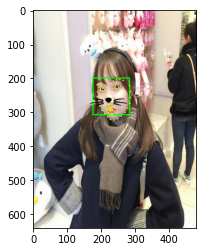

In [12]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]


img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 최종 출력

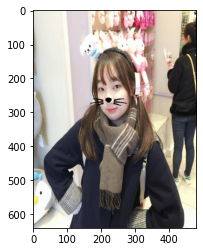

In [13]:
# delete bounding box
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()